In [20]:
import tensorflow as tf


Load data using API

In [4]:
!kaggle datasets download fedesoriano/cifar100

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cifar100
License(s): copyright-authors
 60% 97.0M/161M [00:00<00:00, 1.01GB/s]
100% 161M/161M [00:00<00:00, 960MB/s]  


Unzip data

In [5]:
!unzip /content/cifar100.zip

Archive:  /content/cifar100.zip
  inflating: file.txt                
  inflating: meta                    
  inflating: test                    
  inflating: train                   


Load file using Pickle

In [11]:
import pickle
import numpy as np

def load_cifar100_batch(filepath):
  with open(filepath,'rb') as f:
    batch = pickle.load(f,encoding ='bytes')
    data =batch[b'data']
    labels = batch[b'fine_labels']
    data = data.reshape(-1,3,32,32).transpose(0,2,3,1)
    return data, np.array(labels)

base_path  ='/content/'

#load data

xm_train,ym_train =load_cifar100_batch(base_path + 'train')
xm_test,ym_test = load_cifar100_batch(base_path + 'test')

print("Train data:", xm_train.shape, ym_train.shape)
print("Train:",xm_test.shape,ym_test.shape)


Train data: (50000, 32, 32, 3) (50000,)
Train: (10000, 32, 32, 3) (10000,)


Check Data

In [12]:
import matplotlib.pyplot as plt


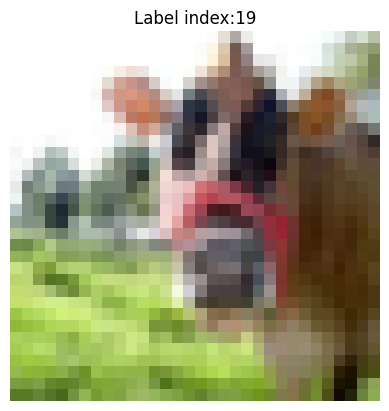

In [15]:
plt.imshow(xm_train[0])
plt.title(f"Label index:{ym_train[0]}")
plt.axis('off')
plt.show()

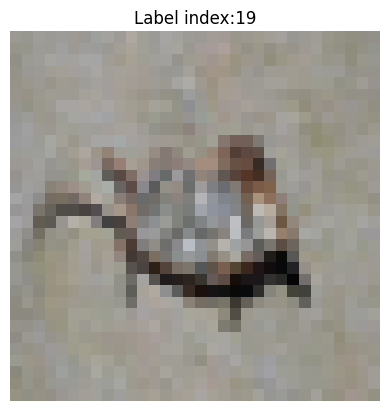

In [16]:
plt.imshow(xm_train[20])
plt.title(f"Label index:{ym_train[0]}")
plt.axis('off')
plt.show()

Scale Data

In [19]:
xm_train = xm_train/225.0
xm_test = xm_test/225.0


Re-Shape data

In [32]:
xm_train=xm_train.reshape(-1,32*32*3)
xm_test=xm_test.reshape(-1,32*32*3)

In [33]:
model =tf.keras.models.Sequential()

In [34]:
model.add(tf.keras.layers.Input(shape=(3072,)))

In [35]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

In [36]:
model.add(tf.keras.layers.Dropout(0,2))

In [37]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

In [38]:
model.add(tf.keras.layers.Dropout(0,2))

In [42]:
model.add(tf.keras.layers.Dense(100,activation='softmax'))

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(xm_train,ym_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0128 - loss: 4.5858
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0228 - loss: 4.4699
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0283 - loss: 4.3798
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.0309 - loss: 4.3211
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0326 - loss: 4.2790
